In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV,KFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
X=train.drop('quality',axis=1)
y=train['quality'] 

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [4]:
dtc=DecisionTreeClassifier(random_state=23,max_depth=4) 
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=23)

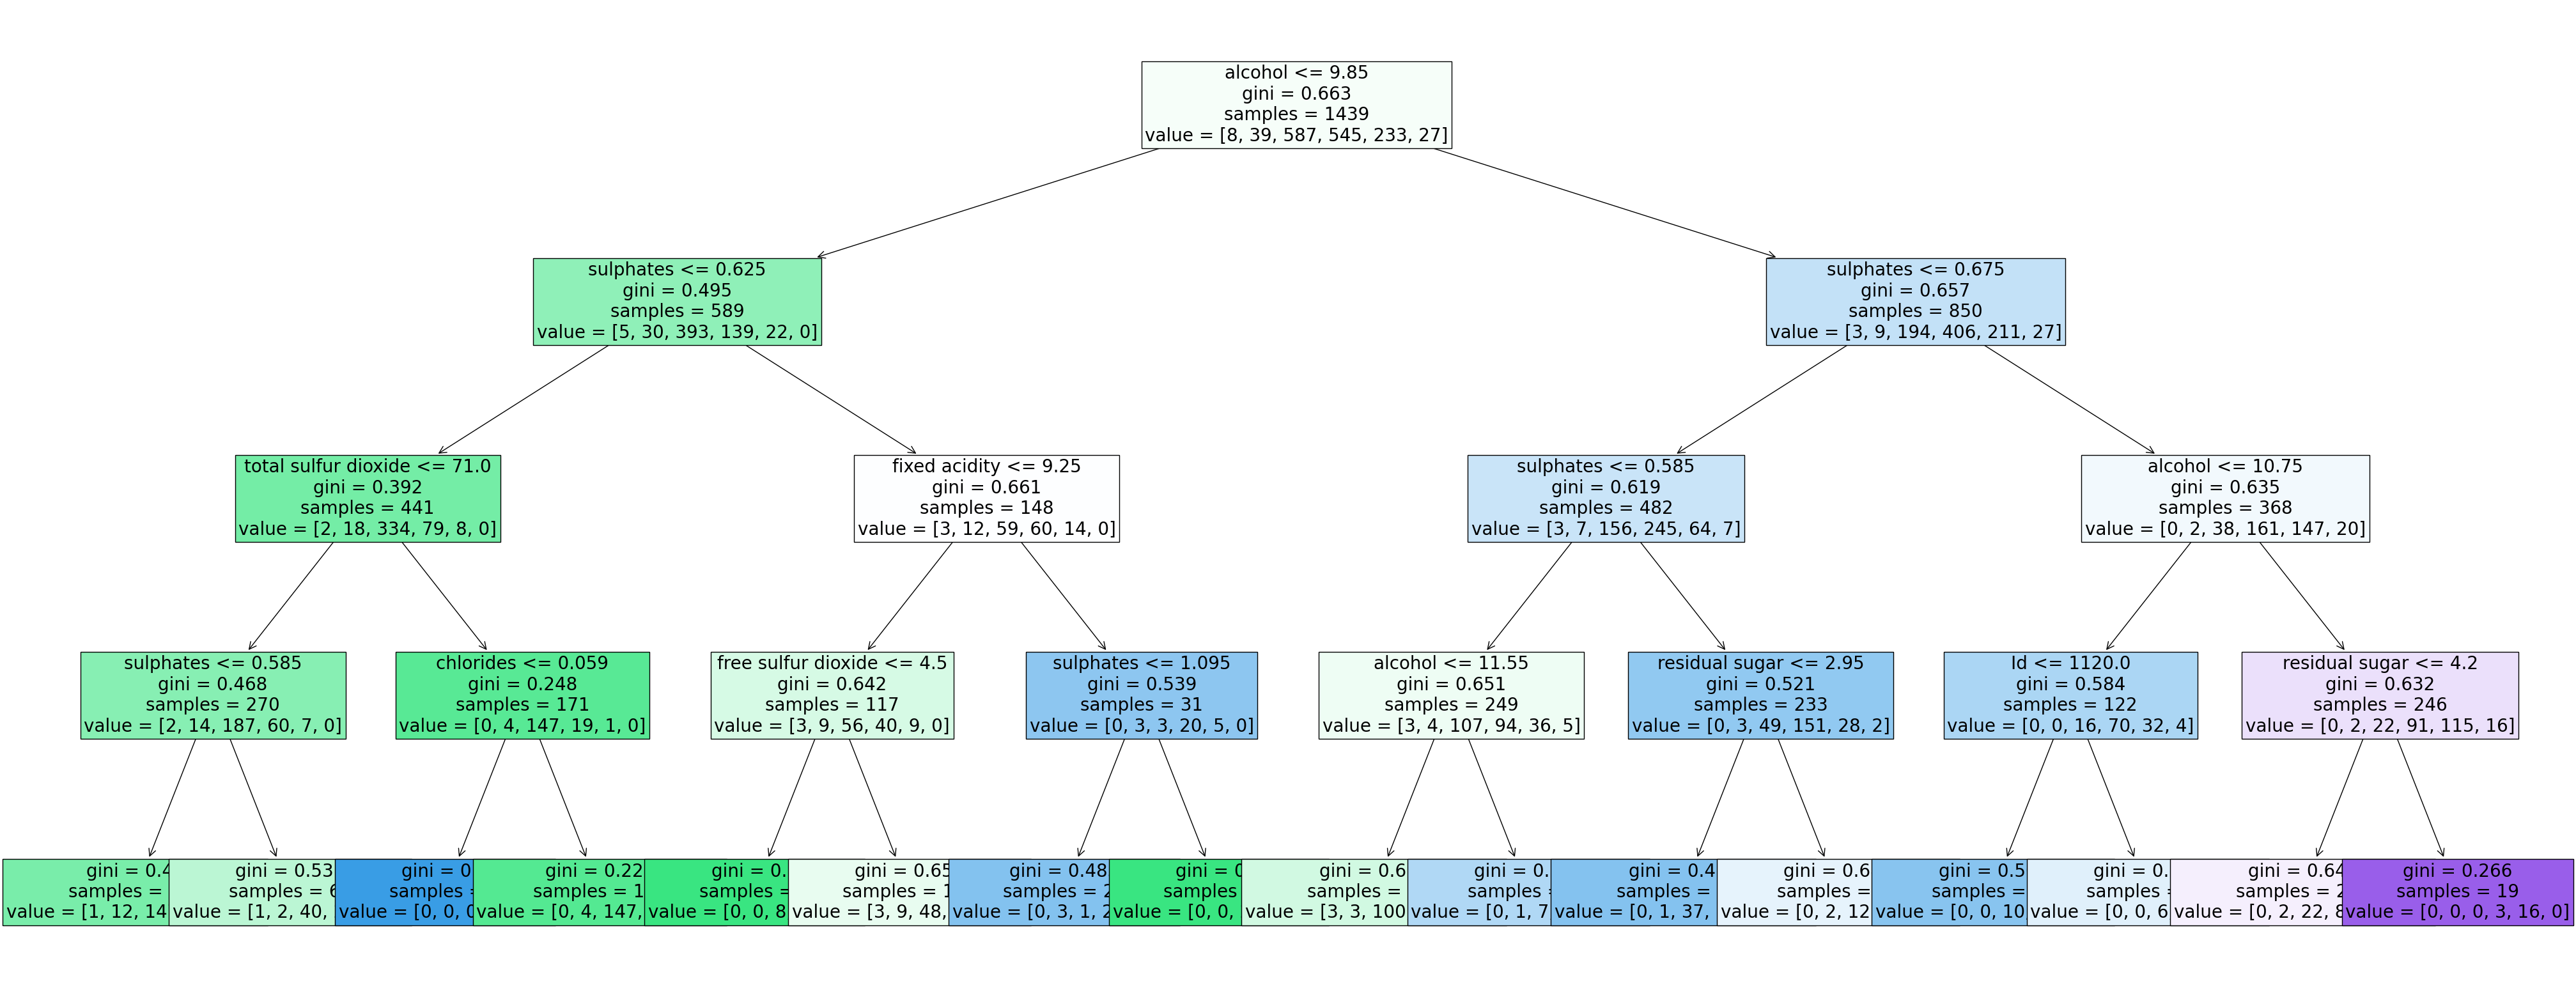

In [5]:
#Creating a graphical representation of Tree
plt.figure(figsize=(50,20))
plot_tree(dtc,feature_names=X_train.columns, filled=True,fontsize=20)
plt.show()

In [6]:
dtc.predict(X_test)

array([7, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 5, 7, 7, 5, 5,
       6, 5, 6, 6, 7, 7, 5, 5, 6, 5, 6, 7, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5,
       6, 7, 5, 7, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 7, 5, 5, 5, 5, 6, 6, 6,
       6, 6, 7, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 7, 5,
       5, 5, 5, 6, 7, 5, 7, 5, 5, 5, 6, 7, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       7, 5, 5, 6, 5, 7, 6, 5, 6, 6, 7, 6, 6, 7, 7, 5, 5, 6, 5, 7, 6, 5,
       6, 7, 6, 7, 5, 5, 7, 5, 7, 6, 5, 5, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6,
       6, 5, 7, 6, 5, 7, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 7, 6, 5, 5, 6,
       6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 7, 6, 5, 6, 6, 7, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 5, 7, 5,
       5, 5, 6, 7, 6, 5, 7, 7, 7, 6, 7, 6, 6, 7, 6, 6, 6, 5, 7, 7, 5, 6,
       6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5,
       5, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 6, 5, 7, 5, 5, 5, 7, 6, 7, 5, 6,
       6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5,

In [7]:
dtc.predict_proba(X_test)

array([[0.        , 0.00881057, 0.0969163 , 0.3876652 , 0.43612335,
        0.07048458],
       [0.        , 0.02173913, 0.15217391, 0.54347826, 0.23913043,
        0.04347826],
       [0.01477833, 0.01477833, 0.49261084, 0.33990148, 0.12315271,
        0.01477833],
       ...,
       [0.        , 0.02173913, 0.15217391, 0.54347826, 0.23913043,
        0.04347826],
       [0.        , 0.00881057, 0.0969163 , 0.3876652 , 0.43612335,
        0.07048458],
       [0.00497512, 0.05970149, 0.73134328, 0.17412935, 0.02985075,
        0.        ]])

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
-1.0821447133478768


In [9]:
best_model=gcv.best_estimator_
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,Id,0.000000
1,fixed acidity,0.000000
2,volatile acidity,0.000000
3,citric acid,0.000000
4,residual sugar,0.000000
5,chlorides,0.000000
6,free sulfur dioxide,0.000000
7,total sulfur dioxide,0.000000
8,density,0.000000
9,pH,0.000000


In [10]:
df_imp=df_imp[df_imp['importance']>0.0001]

In [11]:
df_imp=df_imp.sort_values(by='importance',ascending=False)

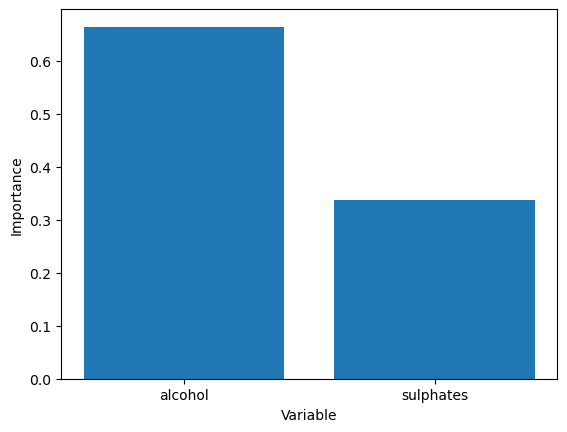

In [12]:
plt.bar(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.xlabel("Variable")
plt.show()

In [13]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [14]:
X_test

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1465,1465,7.9,0.31,0.42,2.1,0.074,24.0,44.0,0.99534,3.30,0.85,11.4
2010,2010,8.4,0.48,0.31,2.2,0.072,11.0,50.0,0.99364,3.31,0.56,12.3
206,206,8.4,1.04,0.24,1.9,0.078,10.0,45.0,0.99580,3.21,0.56,10.1
1108,1108,8.2,1.18,0.25,1.8,0.081,11.0,65.0,0.99632,3.31,0.55,9.5
321,321,8.1,0.39,0.42,2.1,0.079,27.0,60.0,0.99608,3.30,0.85,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1097,6.2,0.51,0.11,2.2,0.084,14.0,26.0,0.99538,3.54,0.89,11.1
1992,1992,5.0,0.32,0.00,1.9,0.044,8.0,18.0,0.99235,3.78,0.73,12.4
1808,1808,6.8,0.58,0.01,2.6,0.067,27.0,43.0,0.99528,3.41,0.56,12.4
555,555,11.1,0.38,0.52,2.4,0.070,7.0,38.0,0.99672,3.25,0.85,11.0


In [26]:
#Inferencing
best_model=gcv.best_estimator_
test=pd.read_csv(r"test.csv")

In [29]:
y_pred=best_model.predict(test)
submit_lg=pd.DataFrame({'Id':test.Id,'quality':y_pred})
submit_lg.to_csv(r"/home/dai/Desktop/Practical Machine Learning/Day-08/submittest.csv",index=False)

# Logistic Regression

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,accuracy_score
from sklearn.linear_model import ElasticNet

In [31]:
wine=pd.read_csv('train.csv')
X=wine.drop('quality',axis=1)
y=wine['quality'] 

In [35]:
#logloss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

lr=LogisticRegression()
params={'penalty':["l1","l2","elastic",None],
       'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}
#Default scoring-acc score
gcv=GridSearchCV(lr,param_grid=params,verbose=2,cv=kfold,scoring="neg_log_loss",n_jobs=-1)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: 

{'penalty': 'l2', 'solver': 'newton-cg'}
-1.0412174767722326


/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [36]:
#Inferencing
best_model=gcv.best_estimator_
test=pd.read_csv(r"test.csv")
y_pred=best_model.predict(test)
submit_lg=pd.DataFrame({'Id':test.Id,'quality':y_pred})
submit_lg.to_csv(r"/home/dai/Desktop/Practical Machine Learning/Day-08/submitltest.csv",index=False)

# SVM